<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/analise_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>

<center>

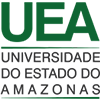

</center>

---

## <center>Código fonte do TCC: Análise dos dados de todos biomas do período de 2020 até 2021</center>
##### <center>**Orientadora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparação do Ambiente

---



In [2]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

     |████████████████████████████████| 1.0 MB 26.1 MB/s 
     |████████████████████████████████| 16.7 MB 52.5 MB/s 
     |████████████████████████████████| 6.3 MB 45.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 162 kB 32.8 MB/s 
     |████████████████████████████████| 47 kB 5.7 MB/s 
     |████████████████████████████████| 1.0 MB 58.7 MB/s 
     |████████████████████████████████| 2.3 MB 56.4 MB/s 
     |████████████████████████████████| 51 kB 306 kB/s 
     |████████████████████████████████| 47 kB 5.7 MB/s 
     |████████████████████████████████| 144 kB 74.3 MB/s 
     |████████████████████████████████| 5.8 MB 62.1 MB/s 
     |████████████████████████████████| 251 kB 75.9 MB/s 
     |████████████████████████████████| 127 kB 74.2 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=161ecb3de87b042a94430674fff952c328b2bf6647611a2fd0922de4969c1142
  Stored in directory: /root/.cache/pip/wh

In [3]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.cluster import MeanShift
#from sklearn.cluster import estimate_bandwidth

## Carregamento e preparação do DataFrame de todos os Biomas

---



In [4]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# # Criando os DataFrames de focos de queimadas do Brasil
alertas_2020 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/focos_biomas_2020-01-01_2020-12-31.csv') 

In [7]:
alertas_2020

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/06/17 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,TAPURAH,Amazonia,34.0,0.0,0.8,-12.507,-56.462,21.6
1,2020/06/17 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,SANTA TEREZINHA,Cerrado,29.0,0.0,0.7,-10.673,-51.095,32.5
2,2020/06/17 17:35:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,CANDIOTA,Pampa,5.0,0.1,0.1,-31.549,-53.646,4.7
3,2020/06/17 17:35:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,PIRATINI,Pampa,5.0,0.0,0.0,-31.795,-52.925,50.0
4,2020/06/17 17:35:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,9.0,0.0,0.7,-20.876,-57.852,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
222792,2020/06/12 17:15:00,AQUA_M-T,Brasil,PARANA,PLANALTINA DO PARANA,Mata Atlantica,6.0,0.0,1.0,-23.221,-53.000,5.3
222793,2020/06/12 17:15:00,AQUA_M-T,Brasil,SAO PAULO,ITAPORANGA,Mata Atlantica,2.0,0.0,1.0,-23.607,-49.449,10.0
222794,2020/06/12 17:15:00,AQUA_M-T,Brasil,PARANA,CIANORTE,Mata Atlantica,2.0,0.0,0.5,-23.742,-52.600,24.6
222795,2020/06/12 17:15:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,ELDORADO,Mata Atlantica,2.0,0.0,0.9,-23.750,-54.333,5.9


## Preparação do DataFrame com os trimestres do ano de 2020 do Bioma Amazônia

Aqui podem ser feitas os filtros para outros Biomas ou períodos. Ou ainda fitrar por outros atributos, como por exemplo um Município específico.

PS.: Caso se mude o período é necessário mudar o nome das variáveis e DataFrames para nomes mais condizentes com o novo conteúdo.

---



In [8]:
alertas_2020.datahora = pd.to_datetime(alertas_2020.datahora) #, format="%d/%m/%Y"

In [9]:
df_amazonia_2020_trim1=alertas_2020[(alertas_2020.datahora>='2020-01-01')& (alertas_2020.datahora<='2020-03-31')&(alertas_2020.bioma=='Amazonia')]
df_amazonia_2020_trim2=alertas_2020[(alertas_2020.datahora>='2020-04-01')& (alertas_2020.datahora<='2020-06-30')&(alertas_2020.bioma=='Amazonia')]
df_amazonia_2020_trim3=alertas_2020[(alertas_2020.datahora>='2020-07-01')& (alertas_2020.datahora<='2020-09-30')&(alertas_2020.bioma=='Amazonia')]
df_amazonia_2020_trim4=alertas_2020[(alertas_2020.datahora>='2020-10-01')& (alertas_2020.datahora<='2020-12-31')&(alertas_2020.bioma=='Amazonia')]

In [10]:
#df_amazonia_2020_trim1
#df_amazonia_2020_trim2
#df_amazonia_2020_trim3
df_amazonia_2020_trim4

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
30,2020-11-27 16:30:00,AQUA_M-T,Brasil,MATO GROSSO,SANTA TEREZINHA,Amazonia,0.0,3.1,0.1,-10.221,-50.521,43.4
32,2020-11-27 16:35:00,AQUA_M-T,Brasil,MARANHAO,NOVA OLINDA DO MARANHAO,Amazonia,1.0,3.4,0.0,-2.804,-45.932,15.7
34,2020-11-27 16:30:00,AQUA_M-T,Brasil,MATO GROSSO,SANTA TEREZINHA,Amazonia,0.0,3.2,0.2,-10.216,-50.529,51.6
35,2020-11-27 16:35:00,AQUA_M-T,Brasil,AMAPA,OIAPOQUE,Amazonia,1.0,0.7,0.0,3.449,-51.482,37.4
38,2020-11-27 16:35:00,AQUA_M-T,Brasil,AMAPA,OIAPOQUE,Amazonia,1.0,0.8,0.0,3.444,-51.469,31.3
...,...,...,...,...,...,...,...,...,...,...,...,...
203666,2020-12-02 16:50:00,AQUA_M-T,Brasil,MATO GROSSO,PARANATINGA,Amazonia,9.0,0.0,0.3,-12.933,-54.127,113.2
203667,2020-12-02 16:50:00,AQUA_M-T,Brasil,PARA,SANTAREM,Amazonia,2.0,0.0,0.2,-2.341,-55.609,57.9
203668,2020-12-02 16:50:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0.0,1.2,0.1,-2.267,-53.599,40.6
203669,2020-12-02 16:50:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,1.0,0.3,0.2,-2.137,-53.555,11.3


## **Criação o GeoDataFrame e Sistema de Referência de Coordenadas**

---



In [11]:
geometrytrim1 = [Point(xy) for xy in zip(df_amazonia_2020_trim1['longitude'], df_amazonia_2020_trim1['latitude'])]
geometrytrim2 = [Point(xy) for xy in zip(df_amazonia_2020_trim2['longitude'], df_amazonia_2020_trim2['latitude'])]
geometrytrim3 = [Point(xy) for xy in zip(df_amazonia_2020_trim3['longitude'], df_amazonia_2020_trim3['latitude'])]
geometrytrim4 = [Point(xy) for xy in zip(df_amazonia_2020_trim4['longitude'], df_amazonia_2020_trim4['latitude'])]

In [12]:
geodf_amazonia_2020_trim1 = gpd.GeoDataFrame(df_amazonia_2020_trim1, crs='EPSG:4326', geometry=geometrytrim1)
geodf_amazonia_2020_trim2 = gpd.GeoDataFrame(df_amazonia_2020_trim2, crs='EPSG:4326', geometry=geometrytrim2)
geodf_amazonia_2020_trim3 = gpd.GeoDataFrame(df_amazonia_2020_trim3, crs='EPSG:4326', geometry=geometrytrim3)
geodf_amazonia_2020_trim4 = gpd.GeoDataFrame(df_amazonia_2020_trim4, crs='EPSG:4326', geometry=geometrytrim4)

In [13]:
type(geodf_amazonia_2020_trim1)
#type(geodf_amazonia_2020_trim2)
#type(geodf_amazonia_2020_trim3)
#type(geodf_amazonia_2020_trim4)

geopandas.geodataframe.GeoDataFrame

In [14]:
geodf_amazonia_2020_trim1

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
7375,2020-01-06 17:10:00,AQUA_M-T,Brasil,AMAZONAS,MANACAPURU,Amazonia,4.0,0.0,0.0,-3.061,-61.283,66.8,POINT (-61.28300 -3.06100)
7393,2020-01-07 17:50:00,AQUA_M-T,Brasil,AMAZONAS,NOVO ARIPUANA,Amazonia,2.0,0.0,0.0,-7.767,-61.173,8.8,POINT (-61.17300 -7.76700)
7624,2020-01-29 17:20:00,AQUA_M-T,Brasil,RORAIMA,IRACEMA,Amazonia,10.0,0.0,0.5,2.130,-61.855,24.7,POINT (-61.85500 2.13000)
7625,2020-01-29 17:20:00,AQUA_M-T,Brasil,RORAIMA,CANTA,Amazonia,11.0,0.0,0.5,2.284,-60.519,10.3,POINT (-60.51900 2.28400)
7626,2020-01-29 17:20:00,AQUA_M-T,Brasil,RORAIMA,CANTA,Amazonia,11.0,0.0,0.5,2.286,-60.506,11.1,POINT (-60.50600 2.28600)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213586,2020-03-25 18:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVA MARINGA,Amazonia,1.0,1.3,0.0,-12.179,-57.527,29.6,POINT (-57.52700 -12.17900)
213587,2020-03-25 18:05:00,AQUA_M-T,Brasil,MATO GROSSO,JUARA,Amazonia,0.0,1.1,0.0,-11.974,-57.661,82.6,POINT (-57.66100 -11.97400)
213588,2020-03-25 18:05:00,AQUA_M-T,Brasil,MATO GROSSO,JUARA,Amazonia,0.0,0.7,0.0,-11.969,-57.635,190.1,POINT (-57.63500 -11.96900)
213589,2020-03-25 18:05:00,AQUA_M-T,Brasil,MATO GROSSO,JUARA,Amazonia,0.0,0.7,0.0,-11.968,-57.642,247.0,POINT (-57.64200 -11.96800)


In [15]:
geodf_amazonia_2020_trim1 = geodf_amazonia_2020_trim1.to_crs(crs='EPSG:3857')
geodf_amazonia_2020_trim2 = geodf_amazonia_2020_trim2.to_crs(crs='EPSG:3857')
geodf_amazonia_2020_trim3 = geodf_amazonia_2020_trim3.to_crs(crs='EPSG:3857')
geodf_amazonia_2020_trim4 = geodf_amazonia_2020_trim4.to_crs(crs='EPSG:3857')

In [16]:
geodf_amazonia_2020_trim1.crs.to_string()
geodf_amazonia_2020_trim2.crs.to_string()
geodf_amazonia_2020_trim3.crs.to_string()
geodf_amazonia_2020_trim4.crs.to_string()

'EPSG:3857'

## **Geração dos gráficos de quantitativos e localização dos focos por Biomas**

In [17]:
geodf_amazonia_2020_trim1['estado'].unique()
geodf_amazonia_2020_trim2['estado'].unique()
geodf_amazonia_2020_trim3['estado'].unique()
geodf_amazonia_2020_trim4['estado'].unique()

array(['MATO GROSSO', 'MARANHAO', 'AMAPA', 'AMAZONAS', 'PARA', 'ACRE',
       'RONDONIA', 'RORAIMA', 'TOCANTINS'], dtype=object)

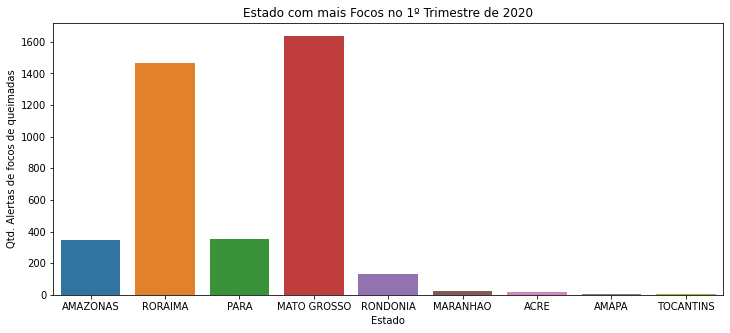

In [18]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='estado', data=geodf_amazonia_2020_trim1)
ax.set_title("Estado com mais Focos no 1º Trimestre de 2020")

#ax = sns.countplot(x='estado', data=geodf_amazonia_2020_trim2)
#ax.set_title("Estado com mais Focos no 2º Trimestre de 2020")

#ax = sns.countplot(x='estado', data=geodf_amazonia_2020_trim3)
#ax.set_title("Estado com mais Focos no 3º Trimestre de 2020")

#ax = sns.countplot(x='estado', data=geodf_amazonia_2020_trim4)
#ax.set_title("Estado com mais Focos no 4º Trimestre de 2020")

ax.set_xlabel('Estado')
ax.set_ylabel('Qtd. Alertas de focos de queimadas')
plt.show()

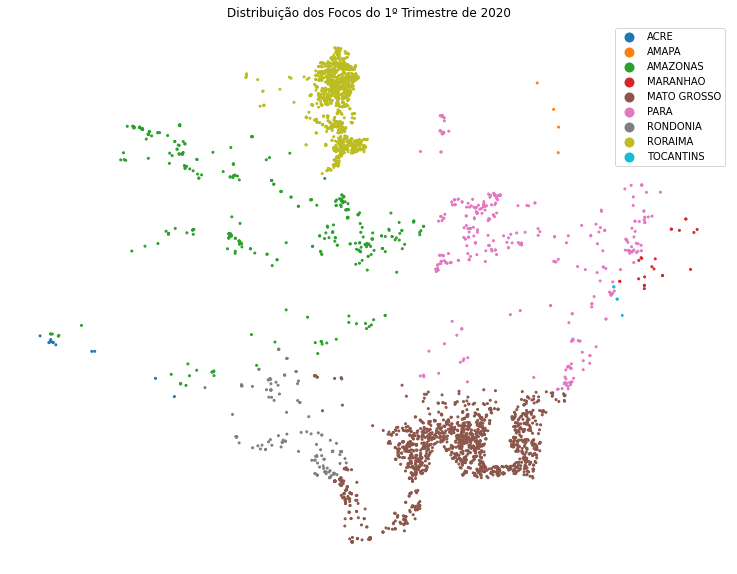

In [19]:
ax = geodf_amazonia_2020_trim1.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
ax.set_title("Distribuição dos Focos do 1º Trimestre de 2020")

#ax = geodf_amazonia_2020_trim2.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
#ax.set_title("Distribuição dos Focos do 2º Trimestre de 2020")

#ax = geodf_amazonia_2020_trim3.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
#ax.set_title("Distribuição dos Focos do 3º Trimestre de 2020")

#ax = geodf_amazonia_2020_trim4.plot(figsize=(15, 10), column='estado', markersize=4, legend=True)
#ax.set_title("Distribuição dos Focos do 4º Trimestre de 2020")

ax.set_axis_off()
#contextily.add_basemap(ax)
plt.show()

**DataFrame Pré-Processado**

In [20]:
coord_trim1 = geodf_amazonia_2020_trim1.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
coord_trim2 = geodf_amazonia_2020_trim2.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
coord_trim3 = geodf_amazonia_2020_trim3.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
coord_trim4 = geodf_amazonia_2020_trim4.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])

In [21]:
#coord_trim1
coord_trim2
#coord_trim3
#coord_trim4

,latitude,longitude
0,-12.507,-56.462
365,-8.645,-61.420
366,-16.149,-59.882
370,-12.058,-54.230
371,-12.060,-54.241
...,...,...
222744,-9.590,-50.517
222745,-9.595,-50.495
222746,-9.597,-50.510
222747,-9.599,-50.500


## **Aplicação dos Algoritmos para os Biomas**


*   K-Means

In [22]:
agrupadorK_trim1 = KMeans(n_clusters=9)
agrupadorK_trim2 = KMeans(n_clusters=9)
agrupadorK_trim3 = KMeans(n_clusters=9)
agrupadorK_trim4 = KMeans(n_clusters=9)

In [23]:
agrupadorK_trim1.fit(coord_trim1)
agrupadorK_trim2.fit(coord_trim2)
agrupadorK_trim3.fit(coord_trim3)
agrupadorK_trim4.fit(coord_trim4)

KMeans(n_clusters=9)

In [24]:
agrupadorK_trim1.labels_
agrupadorK_trim2.labels_
agrupadorK_trim3.labels_
agrupadorK_trim4.labels_

array([3, 0, 3, ..., 2, 2, 2], dtype=int32)

In [25]:
np.unique(agrupadorK_trim1.labels_)
np.unique(agrupadorK_trim2.labels_)
np.unique(agrupadorK_trim3.labels_)
np.unique(agrupadorK_trim4.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [26]:
coord_trim1['Grupo'] = agrupadorK_trim1.labels_
coord_trim2['Grupo'] = agrupadorK_trim2.labels_
coord_trim3['Grupo'] = agrupadorK_trim3.labels_
coord_trim4['Grupo'] = agrupadorK_trim4.labels_

In [27]:
coord_trim1

,latitude,longitude,Grupo
7375,-3.061,-61.283,1
7393,-7.767,-61.173,4
7624,2.130,-61.855,5
7625,2.284,-60.519,5
7626,2.286,-60.506,5
...,...,...,...
213586,-12.179,-57.527,2
213587,-11.974,-57.661,2
213588,-11.969,-57.635,2
213589,-11.968,-57.642,2


**Gráfico do Cluster por Trimestre**

In [28]:
'''
c0lat = coord_trim1[coord_trim1['Grupo']==0]['latitude']
c0lon = coord_trim1[coord_trim1['Grupo']==0]['longitude']
c1lat = coord_trim1[coord_trim1['Grupo']==1]['latitude']
c1lon = coord_trim1[coord_trim1['Grupo']==1]['longitude']
c2lat = coord_trim1[coord_trim1['Grupo']==2]['latitude']
c2lon = coord_trim1[coord_trim1['Grupo']==2]['longitude']
c3lat = coord_trim1[coord_trim1['Grupo']==3]['latitude']
c3lon = coord_trim1[coord_trim1['Grupo']==3]['longitude']
c4lat = coord_trim1[coord_trim1['Grupo']==4]['latitude']
c4lon = coord_trim1[coord_trim1['Grupo']==4]['longitude']
c5lat = coord_trim1[coord_trim1['Grupo']==5]['latitude']
c5lon = coord_trim1[coord_trim1['Grupo']==5]['longitude']
c6lat = coord_trim1[coord_trim1['Grupo']==6]['latitude']
c6lon = coord_trim1[coord_trim1['Grupo']==6]['longitude']
c7lat = coord_trim1[coord_trim1['Grupo']==7]['latitude']
c7lon = coord_trim1[coord_trim1['Grupo']==7]['longitude']
c8lat = coord_trim1[coord_trim1['Grupo']==8]['latitude']
c8lon = coord_trim1[coord_trim1['Grupo']==8]['longitude']
'''

'''
c0lat = coord_trim2[coord_trim2['Grupo']==0]['latitude']
c0lon = coord_trim2[coord_trim2['Grupo']==0]['longitude']
c1lat = coord_trim2[coord_trim2['Grupo']==1]['latitude']
c1lon = coord_trim2[coord_trim2['Grupo']==1]['longitude']
c2lat = coord_trim2[coord_trim2['Grupo']==2]['latitude']
c2lon = coord_trim2[coord_trim2['Grupo']==2]['longitude']
c3lat = coord_trim2[coord_trim2['Grupo']==3]['latitude']
c3lon = coord_trim2[coord_trim2['Grupo']==3]['longitude']
c4lat = coord_trim2[coord_trim2['Grupo']==4]['latitude']
c4lon = coord_trim2[coord_trim2['Grupo']==4]['longitude']
c5lat = coord_trim2[coord_trim2['Grupo']==5]['latitude']
c5lon = coord_trim2[coord_trim2['Grupo']==5]['longitude']
c6lat = coord_trim2[coord_trim2['Grupo']==6]['latitude']
c6lon = coord_trim2[coord_trim2['Grupo']==6]['longitude']
c7lat = coord_trim2[coord_trim2['Grupo']==7]['latitude']
c7lon = coord_trim2[coord_trim2['Grupo']==7]['longitude']
c8lat = coord_trim2[coord_trim2['Grupo']==8]['latitude']
c8lon = coord_trim2[coord_trim2['Grupo']==8]['longitude']
'''

'''
c0lat = coord_trim3[coord_trim3['Grupo']==0]['latitude']
c0lon = coord_trim3[coord_trim3['Grupo']==0]['longitude']
c1lat = coord_trim3[coord_trim3['Grupo']==1]['latitude']
c1lon = coord_trim3[coord_trim3['Grupo']==1]['longitude']
c2lat = coord_trim3[coord_trim3['Grupo']==2]['latitude']
c2lon = coord_trim3[coord_trim3['Grupo']==2]['longitude']
c3lat = coord_trim3[coord_trim3['Grupo']==3]['latitude']
c3lon = coord_trim3[coord_trim3['Grupo']==3]['longitude']
c4lat = coord_trim3[coord_trim3['Grupo']==4]['latitude']
c4lon = coord_trim3[coord_trim3['Grupo']==4]['longitude']
c5lat = coord_trim3[coord_trim3['Grupo']==5]['latitude']
c5lon = coord_trim3[coord_trim3['Grupo']==5]['longitude']
c6lat = coord_trim3[coord_trim3['Grupo']==6]['latitude']
c6lon = coord_trim3[coord_trim3['Grupo']==6]['longitude']
c7lat = coord_trim3[coord_trim3['Grupo']==7]['latitude']
c7lon = coord_trim3[coord_trim3['Grupo']==7]['longitude']
c8lat = coord_trim3[coord_trim3['Grupo']==8]['latitude']
c8lon = coord_trim3[coord_trim3['Grupo']==8]['longitude']
'''

#'''
c0lat = coord_trim4[coord_trim4['Grupo']==0]['latitude']
c0lon = coord_trim4[coord_trim4['Grupo']==0]['longitude']
c1lat = coord_trim4[coord_trim4['Grupo']==1]['latitude']
c1lon = coord_trim4[coord_trim4['Grupo']==1]['longitude']
c2lat = coord_trim4[coord_trim4['Grupo']==2]['latitude']
c2lon = coord_trim4[coord_trim4['Grupo']==2]['longitude']
c3lat = coord_trim4[coord_trim4['Grupo']==3]['latitude']
c3lon = coord_trim4[coord_trim4['Grupo']==3]['longitude']
c4lat = coord_trim4[coord_trim4['Grupo']==4]['latitude']
c4lon = coord_trim4[coord_trim4['Grupo']==4]['longitude']
c5lat = coord_trim4[coord_trim4['Grupo']==5]['latitude']
c5lon = coord_trim4[coord_trim4['Grupo']==5]['longitude']
c6lat = coord_trim4[coord_trim4['Grupo']==6]['latitude']
c6lon = coord_trim4[coord_trim4['Grupo']==6]['longitude']
c7lat = coord_trim4[coord_trim4['Grupo']==7]['latitude']
c7lon = coord_trim4[coord_trim4['Grupo']==7]['longitude']
c8lat = coord_trim4[coord_trim4['Grupo']==8]['latitude']
c8lon = coord_trim4[coord_trim4['Grupo']==8]['longitude']
#'''

x0 = c0lat 
y0 = c0lon
x1 = c1lat
y1 = c1lon
x2 = c2lat
y2 = c2lon
x3 = c3lat
y3 = c3lon
x4 = c4lat
y4 = c4lon
x5 = c5lat
y5 = c5lon
x6 = c6lat
y6 = c6lon
x7 = c7lat
y7 = c7lon
x8 = c8lat
y8 = c8lon

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="paleturquoise")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="limegreen")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="tomato")
    )
)

fig.add_trace(
    go.Scatter(
        x=x3,
        y=y3,
        mode="markers",
        marker=dict(color="dodgerblue")
    )
)

fig.add_trace(
    go.Scatter(
        x=x4,
        y=y4,
        mode="markers",
        marker=dict(color="rebeccapurple")
    )
)

fig.add_trace(
    go.Scatter(
        x=x5,
        y=y5,
        mode="markers",
        marker=dict(color="yellow")
    )
)

fig.add_trace(
    go.Scatter(
        x=x6,
        y=y6,
        mode="markers",
        marker=dict(color="chartreuse")
    )
)

fig.add_trace(
    go.Scatter(
        x=x7,
        y=y7,
        mode="markers",
        marker=dict(color="chocolate")
    )
)

fig.add_trace(
    go.Scatter(
        x=x8,
        y=y8,
        mode="markers",
        marker=dict(color="red")
    )
)


# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="paleturquoise"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="limegreen"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="tomato"))]
cluster3 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x3), y0=min(y3),
                            x1=max(x3), y1=max(y3),
                            line=dict(color="dodgerblue"))]
cluster4 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x4), y0=min(y4),
                            x1=max(x4), y1=max(y4),
                            line=dict(color="rebeccapurple"))]
cluster5 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x5), y0=min(y5),
                            x1=max(x5), y1=max(y5),
                            line=dict(color="yellow"))]
cluster6 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x6), y0=min(y6),
                            x1=max(x6), y1=max(y6),
                            line=dict(color="chartreuse"))]
cluster7 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x7), y0=min(y7),
                            x1=max(x7), y1=max(y7),
                            line=dict(color="chocolate"))]
cluster8 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x8), y0=min(y8),
                            x1=max(x8), y1=max(y8),
                            line=dict(color="red"))]
fig.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(label="None",
                 method="relayout",
                 args=["shapes", []]),
            dict(label="Cluster 0",
                 method="relayout",
                 args=["shapes", cluster0]),
            dict(label="Cluster 1",
                 method="relayout",
                 args=["shapes", cluster1]),
            dict(label="Cluster 2",
                 method="relayout",
                 args=["shapes", cluster2]),
            dict(label="Cluster 3",
                 method="relayout",
                 args=["shapes", cluster3]),
            dict(label="Cluster 4",
                 method="relayout",
                 args=["shapes", cluster4]),
            dict(label="Cluster 5",
                 method="relayout",
                 args=["shapes", cluster5]),
            dict(label="Cluster 6",
                 method="relayout",
                 args=["shapes", cluster6]),
            dict(label="Cluster 7",
                 method="relayout",
                 args=["shapes", cluster7]),
            dict(label="Cluster 8",
                 method="relayout",
                 args=["shapes", cluster8]),
            dict(label="All",
                 method="relayout",
                 args=["shapes", cluster0 + cluster1 + cluster2 + cluster3 + cluster4 + cluster5 + cluster6 + cluster7 + cluster8])
        ]),
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Clusters com as coordenadas do 1º Trimestre de 2020",
    #title_text="Clusters com as coordenadas do 2º Trimestre de 2020",
    #title_text="Clusters com as coordenadas do 3º Trimestre de 2020",
    #title_text="Clusters com as coordenadas do 4º Trimestre de 2020",
    showlegend=False,
)
fig.show()